In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt


wavlist = pywt.wavelist(kind="continuous")
print(wavlist)

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


In [2]:
wavelet_name: str = "cmor1.5-1.0"

In [3]:
# how many peaks and troughs the wave has depends on this
scale: float = 10

In [4]:
# Complex morlet wavelet object
wav = pywt.ContinuousWavelet("cmor1.5-1.0")

In [5]:
# Integrate psi wavelet function from - infinity to x
# using the rectangle integration method
int_psi, x = pywt.integrate_wavelet(wav, precision=10)
int_psi /= np.abs(int_psi).max()
wav_filter: np.ndarray = int_psi[::-1]

nt: int = len(wav_filter)
t: np.ndarray = np.linspace(-nt // 2, nt // 2, nt)

Text(0.5, 1.0, 'filter cmor1.5-1.0')

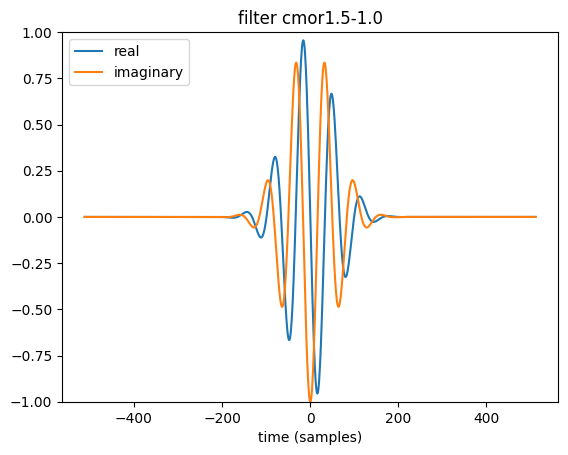

In [6]:
plt.plot(t, wav_filter.real)
plt.plot(t, wav_filter.imag)
plt.ylim([-1, 1])
plt.legend(["real", "imaginary"], loc="upper left")
plt.xlabel("time (samples)")
plt.title("filter " + wavelet_name) 

## Analyzing a Test Signal

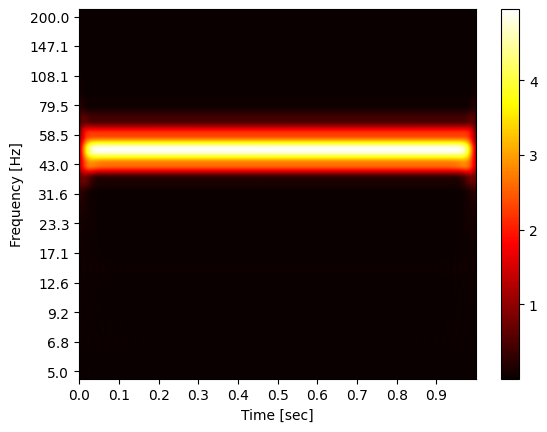

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from Wavelet2Go import Wavelet2Go

f_test: float = 50  # Hz
t_test: np.ndarray = np.arange(0, 1000) / 1000
test_data: np.ndarray = np.sin(2 * np.pi * f_test * t_test)

# Prepare wavelet
# This needs to be done only once (as long as the length of Data doesn't changes) ->
my_wavelet2go = Wavelet2Go(f_n=25, f_min=5, f_max=200, dt=1.0 / 1000)
y_ticks, y_ticks_freqs = my_wavelet2go.get_y_ticks(reduction_to=10)
x_ticks, x_ticks_time = my_wavelet2go.get_x_ticks(reduction_to=10, data=test_data)
# <- This needs to be done only once

# Transformation -> Complex Spectrum
complex_spectrum, frequency_axis = my_wavelet2go.perform_transform(test_data)

plt.imshow(abs(complex_spectrum) ** 2, cmap="hot", aspect="auto")
plt.colorbar()

plt.yticks(y_ticks, np.round(y_ticks_freqs, 1))
plt.xticks(x_ticks, np.round(x_ticks_time, 1))

plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()

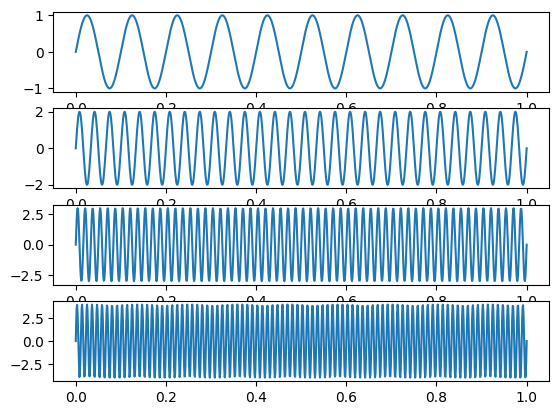

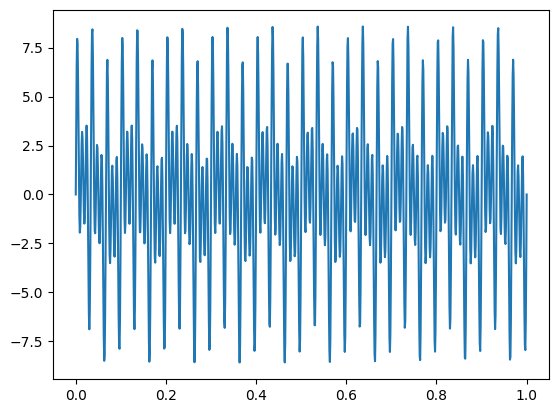

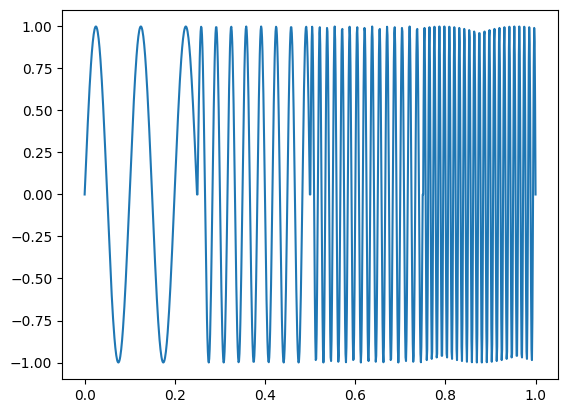

In [10]:
t_n = 1
N = 1000 
T = t_n/N    #sampling period
fs = 1 / T
#number of sample points for 1 second
t1 = np.linspace(0, t_n, num=N) #time array
t2 = np.linspace(0, t_n/4, num=int(N/4))
pi = np.pi

frequencies = [10, 30, 60, 90]
sig1_1, sig2_1 = 1 * np.sin(2*pi*frequencies[0]*t1), np.sin(2*pi*frequencies[0]*t2)
sig1_2, sig2_2 = 2 * np.sin(2*pi*frequencies[1]*t1), np.sin(2*pi*frequencies[1]*t2)
sig1_3, sig2_3 = 3 * np.sin(2*pi*frequencies[2]*t1), np.sin(2*pi*frequencies[2]*t2)
sig1_4, sig2_4 = 4 * np.sin(2*pi*frequencies[3]*t1), np.sin(2*pi*frequencies[3]*t2)
#generate signal
signal1 = sig1_1 + sig1_2 + sig1_3 + sig1_4
signal2 = np.concatenate([sig2_1, sig2_2, sig2_3, sig2_4])
fig, axarr = plt.subplots(nrows=4, ncols=1)
axarr[0].plot(t1, sig1_1)
axarr[1].plot(t1, sig1_2)
axarr[2].plot(t1, sig1_3)
axarr[3].plot(t1, sig1_4)
(...)
plt.show()
plt.plot(t1, signal1)
plt.show()
plt.plot(t1, signal2)
plt.show()


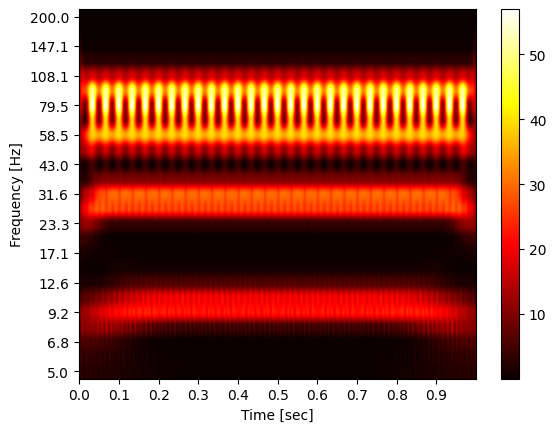

In [11]:
# Transformation -> Complex Spectrum
complex_spectrum, frequency_axis = my_wavelet2go.perform_transform(signal1)

plt.imshow(abs(complex_spectrum) ** 2, cmap="hot", aspect="auto")
plt.colorbar()

plt.yticks(y_ticks, np.round(y_ticks_freqs, 1))
plt.xticks(x_ticks, np.round(x_ticks_time, 1))

plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()

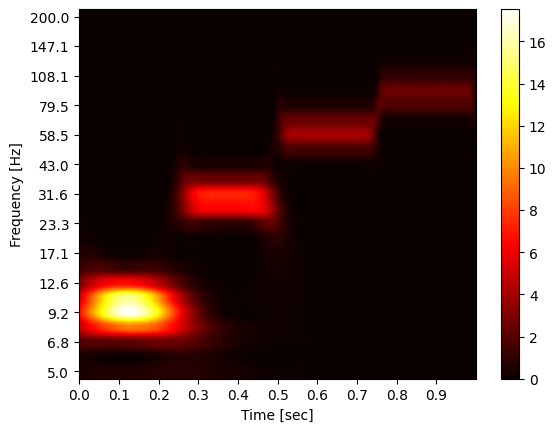

In [12]:
# Transformation -> Complex Spectrum
complex_spectrum, frequency_axis = my_wavelet2go.perform_transform(signal2)

plt.imshow(abs(complex_spectrum) ** 2, cmap="hot", aspect="auto")
plt.colorbar()

plt.yticks(y_ticks, np.round(y_ticks_freqs, 1))
plt.xticks(x_ticks, np.round(x_ticks_time, 1))

plt.xlabel("Time [sec]")
plt.ylabel("Frequency [Hz]")
plt.show()